In [1]:
#importing libraries 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#loading the csv to pandas dataframe
dataset = pd.read_csv('TrainingDataMulti.csv')
X = dataset.iloc[:, :-13].values
y = dataset.iloc[:, -1].values
print(X)
print(y)

[[ 7.36881020e+01  1.30280711e+05 -4.63007190e+01 ...  8.14132788e+00
   2.72100000e-02  0.00000000e+00]
 [ 7.37339390e+01  1.30305784e+05 -4.62548830e+01 ...  8.16275526e+00
   2.66630000e-02  0.00000000e+00]
 [ 7.40834430e+01  1.30581590e+05 -4.58996490e+01 ...  8.13529228e+00
   2.65950000e-02  0.00000000e+00]
 ...
 [ 1.16384917e+02  1.31734961e+05 -3.58671600e+00 ...  1.00440535e+01
   3.89990000e-02  0.00000000e+00]
 [ 1.11125164e+02  1.30506370e+05 -8.84646800e+00 ...  7.80294641e+00
   8.26580000e-02  0.00000000e+00]
 [ 1.10878793e+02  1.30481297e+05 -9.09284000e+00 ...  7.80357825e+00
   8.03250000e-02  0.00000000e+00]]
[0 0 0 ... 0 0 0]


In [3]:
#Train and Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 0)
print(X_train)
print(y_train)
print(X_test)
print(y_test)

[[-1.51587444e+02  1.32637598e+05  8.84532240e+01 ...  1.37355200e+01
  -9.62600000e-03  0.00000000e+00]
 [ 7.00269020e+01  1.31258568e+05 -4.99332720e+01 ...  8.47530770e+00
   6.79420000e-02  0.00000000e+00]
 [ 1.56818550e+01  1.31860327e+05 -1.04306967e+02 ...  1.39098094e+01
  -1.30386000e-01  0.00000000e+00]
 ...
 [-8.07985080e+01  1.32085986e+05  1.59230701e+02 ...  1.20566200e+01
  -1.69280000e-02  0.00000000e+00]
 [-5.83041850e+01  1.31835254e+05 -1.78275818e+02 ...  1.06870559e+01
   2.80380000e-02  0.00000000e+00]
 [ 1.79410274e+02  1.30556517e+05  5.94329120e+01 ...  7.46129035e+00
   8.03500000e-02  0.00000000e+00]]
[0 0 1 ... 2 0 0]
[[ 1.32674107e+02  1.31509301e+05  1.26967450e+01 ...  9.13422407e+00
   5.42710000e-02  0.00000000e+00]
 [-1.31041177e+02  1.30957689e+05  1.08965114e+02 ...  7.93985597e+00
  -6.47100000e-03  0.00000000e+00]
 [-1.23157278e+02  1.32186279e+05  1.16849013e+02 ...  1.20703542e+01
  -1.01310000e-02  0.00000000e+00]
 ...
 [-1.67762042e+02  1.30381

In [4]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
print(X_train)
print(X_test)

[[-1.35473367  0.27805303  0.87754696 ...  0.43031117 -0.15518432
   0.        ]
 [ 0.83633256 -0.048108   -0.41379045 ... -0.34569612  0.36032712
   0.        ]
 [ 0.29903161  0.0942168  -0.92117222 ...  0.45602303 -0.95774675
   0.        ]
 ...
 [-0.65485458  0.14758862  1.53799871 ...  0.18263322 -0.2037129
   0.        ]
 [-0.43245674  0.08828661 -1.61140391 ... -0.0194103   0.09512796
   0.        ]
 [ 1.91778877 -0.21415363  0.60674731 ... -0.49528797  0.44278981
   0.        ]]
[[ 1.45571563  0.01119401  0.17063423 ... -0.24849018  0.26947062
   0.        ]
 [-1.15159596 -0.11927043  1.06895126 ... -0.42468808 -0.13421642
   0.        ]
 [-1.07364909  0.17130941  1.14251894 ...  0.18465934 -0.15854052
   0.        ]
 ...
 [-1.51464938 -0.25566504  0.72666905 ... -0.54745466  0.56215071
   0.        ]
 [ 1.35726239  0.18316982  0.07781918 ...  0.47385131 -0.40610139
   0.        ]
 [ 1.08575122  0.0764262  -0.17854495 ...  0.30904579 -0.48130008
   0.        ]]


In [5]:
# Check all the models from scikit learn and check the accuracy on the given dataset to check performance of each model on given dataset  
from sklearn.metrics import accuracy_score
from sklearn.utils import all_estimators



# Get a list of all available models
all_models = all_estimators(type_filter='classifier')

best_model = None
best_accuracy = 0

# Iterate over all available models and evaluate their performance
for name, ModelClass in all_models:
    try:
        model = ModelClass()
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)

        print(f"Model: {name}")
        print(f"Accuracy: {accuracy}")
        print()

        # Update the best model if the current model performs better
        if accuracy > best_accuracy:
            best_model = model
            best_accuracy = accuracy
    except Exception as e:
        print(f"Error evaluating {name}: {str(e)}")
        print()

# Use the best model for predictions
y_pred = best_model.predict(X_test)
final_accuracy = accuracy_score(y_test, y_pred)
print("Best Model:")
print(best_model)
print(f"Final Accuracy: {final_accuracy}")

Model: AdaBoostClassifier
Accuracy: 0.7244444444444444

Model: BaggingClassifier
Accuracy: 0.9488888888888889

Model: BernoulliNB
Accuracy: 0.5977777777777777



/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Model: CalibratedClassifierCV
Accuracy: 0.7233333333333334

Error evaluating CategoricalNB: Negative values in data passed to CategoricalNB (input X)

Error evaluating ClassifierChain: _BaseChain.__init__() missing 1 required positional argument: 'base_estimator'

Error evaluating ComplementNB: Negative values in data passed to ComplementNB (input X)

Model: DecisionTreeClassifier
Accuracy: 0.9155555555555556

Model: DummyClassifier
Accuracy: 0.5244444444444445

Model: ExtraTreeClassifier
Accuracy: 0.9255555555555556

Model: ExtraTreesClassifier
Accuracy: 0.9777777777777777

Model: GaussianNB
Accuracy: 0.5355555555555556

Model: GaussianProcessClassifier
Accuracy: 0.8711111111111111

Model: GradientBoostingClassifier
Accuracy: 0.8733333333333333

Model: HistGradientBoostingClassifier
Accuracy: 0.9666666666666667

Model: KNeighborsClassifier
Accuracy: 0.8922222222222222



/usr/local/lib/python3.10/dist-packages/sklearn/semi_supervised/_label_propagation.py:231: RuntimeWarning: invalid value encountered in true_divide
  probabilities /= normalizer


Model: LabelPropagation
Accuracy: 0.9355555555555556



/usr/local/lib/python3.10/dist-packages/sklearn/semi_supervised/_label_propagation.py:231: RuntimeWarning: invalid value encountered in true_divide
  probabilities /= normalizer


Model: LabelSpreading
Accuracy: 0.9344444444444444

Model: LinearDiscriminantAnalysis
Accuracy: 0.7166666666666667



/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Model: LinearSVC
Accuracy: 0.7366666666666667



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model: LogisticRegression
Accuracy: 0.7288888888888889



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Model: LogisticRegressionCV
Accuracy: 0.7411111111111112



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Model: MLPClassifier
Accuracy: 0.8722222222222222

Error evaluating MultiOutputClassifier: MultiOutputClassifier.__init__() missing 1 required positional argument: 'estimator'

Error evaluating MultinomialNB: Negative values in data passed to MultinomialNB (input X)

Model: NearestCentroid
Accuracy: 0.4577777777777778

Model: NuSVC
Accuracy: 0.7722222222222223

Error evaluating OneVsOneClassifier: OneVsOneClassifier.__init__() missing 1 required positional argument: 'estimator'

Error evaluating OneVsRestClassifier: OneVsRestClassifier.__init__() missing 1 required positional argument: 'estimator'

Error evaluating OutputCodeClassifier: OutputCodeClassifier.__init__() missing 1 required positional argument: 'estimator'

Model: PassiveAggressiveClassifier
Accuracy: 0.6455555555555555

Model: Perceptron
Accuracy: 0.5844444444444444

Model: QuadraticDiscriminantAnalysis
Accuracy: 0.7088888888888889



/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Error evaluating RadiusNeighborsClassifier: No neighbors found for test samples array([ 29,  30,  34,  37,  40,  55,  56,  63,  71,  88,  99, 101, 106,
       107, 111, 121, 127, 138, 143, 145, 146, 153, 157, 160, 166, 168,
       170, 178, 183, 192, 242, 245, 246, 248, 253, 256, 262, 263, 264,
       266, 267, 268, 289, 290, 299, 306, 312, 313, 321, 341, 343, 345,
       355, 361, 365, 381, 389, 401, 407, 418, 438, 441, 456, 457, 460,
       461, 464, 471, 475, 485, 488, 496, 499, 508, 509, 512, 513, 514,
       521, 526, 528, 535, 540, 565, 569, 572, 575, 598, 618, 622, 626,
       633, 637, 640, 642, 644, 649, 651, 654, 665, 699, 700, 703, 705,
       712, 719, 722, 725, 732, 733, 739, 750, 753, 757, 760, 764, 765,
       768, 771, 773, 786, 795, 797, 807, 825, 831, 840, 847, 848, 854,
       857, 860, 863, 865, 866, 884, 886, 898]), you can try using larger radius, giving a label for outliers, or considering removing them from your dataset.

Model: RandomForestClassifier
Accuracy: 

In [33]:
# Create a Extra Tress classifier and check the accuracy on the given data 
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score, f1_score
# Instantiate and fit the ExtraTreesClassifier
model = ExtraTreesClassifier(n_estimators= 100, criterion = 'log_loss', random_state = 0)
model.fit(X_train, y_train)

# Make predictions on the train set
y_pred_train = model.predict(X_train)

# Evaluate the model's accuracy on train set
accuracy_train = accuracy_score(y_train, y_pred_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's accuracy on test set
accuracy_test = accuracy_score(y_test, y_pred)



In [34]:
# Training accuracy and F1 Score to check the accuracy of model on training set

print('Accuracy Score on training set is '+ str(accuracy_train))
print('F1 score of Training set is ' + str(f1_score(y_train, y_pred_train, average='macro')))

# Training accuracy and F1 Score to check the accuracy of model on testing set

print('Accuracy Score on testing set is '+ str(accuracy_test))
print('F1 score of Testing set is ' + str(f1_score(y_test, y_pred, average='macro')))

Accuracy Score on training set is 1.0
F1 score of Training set is 1.0
Accuracy Score on testing set is 0.98
F1 score of Testing set is 0.9737630092179601


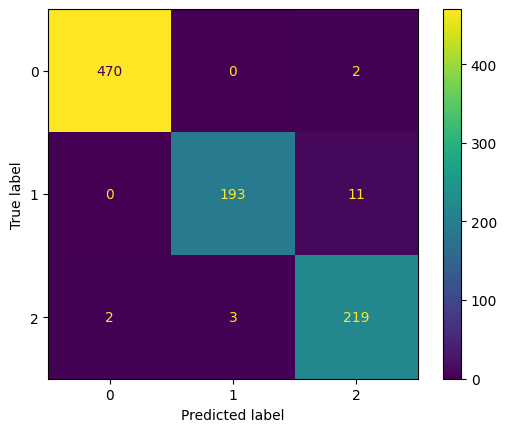

In [35]:
# Creating confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1, 2])
disp.plot()
plt.show()



In [37]:
# (Test Model1)Few more models to check the performance(GradientBoostingClassifier)
from sklearn.ensemble import GradientBoostingClassifier
# Instantiate and fit the GradientBoostingClassifier
model1 = GradientBoostingClassifier()
model1.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model1.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy
print(f"Accuracy: {accuracy}")

Accuracy: 0.8755555555555555


In [38]:
#(Test Model 2)Few more models to check the performance(BaggingClassifier)
from sklearn.ensemble import BaggingClassifier
# Instantiate and fit the BaggingClassifier
model2 = BaggingClassifier()
model2.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model2.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy
print(f"Accuracy: {accuracy}")

Accuracy: 0.9488888888888889


In [36]:
#Using the model with Highest accuracy(Extra Tress Classifier) To predict on testing data 
new_data = pd.read_csv('TestingDataMulti.csv',header=None)
new_data1 = new_data.iloc[:, :-12].values
new_data1 = sc.transform(new_data1)
print(new_data1)
predictions = model.predict(new_data1)
print(predictions)
new_data['predictions'] = predictions
new_data.to_csv('TestingResultsMulti.csv', index=False, header=False)


[[-0.84609633  0.20689063  1.35744778 ...  1.2139314  -1.29957348
   0.        ]
 [-0.84734257  0.20096042  1.35605769 ...  1.06676522 -1.11484323
   0.        ]
 [-0.84768246  0.20689063  1.35584384 ...  1.04191643 -1.10573166
   0.        ]
 ...
 [ 1.91019802 -0.05996842  0.59963648 ... -0.30959117  0.31920876
   0.        ]
 [ 1.91002808 -0.05996842  0.59942262 ... -0.30849135  0.31413127
   0.        ]
 [ 1.90997143 -0.05403821  0.59936915 ... -0.30765541  0.31526772
   0.        ]]
[2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1
 1 2 1 1 1 2 2 2 2 2 2 2 1 1 1 1 1 2 2 2 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0]
